Exercise: _Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the `shift()` function from the `scipy.ndimage` module. For example, `shift(image, [2, 1], cval=0)` shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_._

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
from scipy.ndimage import shift

In [15]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
def shift_image(image,dx,dy):
    image=image.reshape(28,28)
    shifted_image=shift(image,[dy,dx],mode='constant',cval=0)
    image=shifted_image.reshape([-1])
    print(image.shape)
    return image

(784,)
(784,)


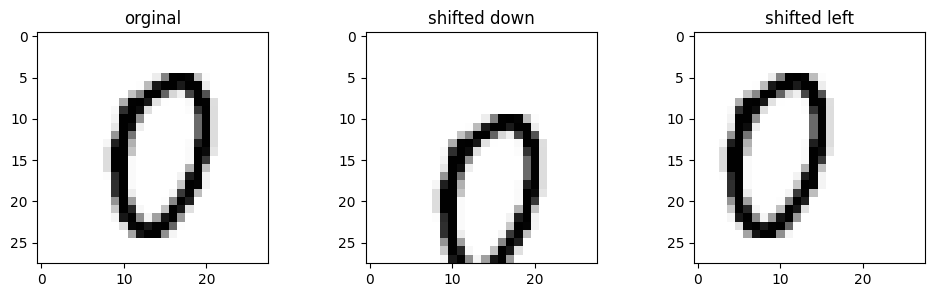

In [17]:
image=x_train[1000]
shift_image_down=shift_image(image,0,5)
shift_image_left=shift_image(image,-5,0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('orginal')
plt.imshow(image.reshape(28,28),interpolation='nearest',cmap='Greys')

plt.subplot(132)
plt.title('shifted down')
plt.imshow(shift_image_down.reshape(28,28),interpolation='nearest',cmap='Greys')

plt.subplot(133)
plt.title('shifted left')
plt.imshow(shift_image_left.reshape(28,28),interpolation='nearest',cmap="Greys")
plt.show()

In [18]:
x_train_augmented = [image for image in x_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(x_train, y_train):
        x_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)

(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)

In [19]:
shuffle_idx=np.random.permutation(len(x_train_augmented))

x_train_augmented=x_train_augmented[shuffle_idx]
y_train_augmented=y_train_augmented[shuffle_idx]

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf=KNeighborsClassifier()
grid_param=[{'weights':['uniform','distance'],'n_neighbors':[3,4,5,6]}]
grid_search=GridSearchCV(knn_clf,cv=5,param_grid=grid_param)

In [21]:
grid_search.fit(x_train_augmented,y_train_augmented)

: 

In [ ]:
augmented_accuracy=grid_search.score(x_test,y_test)
augmented_accuracy

: 

: 

: 

: 